### Data visualization
## Seaborn
* Seaborn is a statistical plotting library
* it is build on pandas
* it has beautiful default styles
* it also is designed to work very well with pandas dataframe objects. 
### install seaborn using conda /pip
* conda install seaborn
* pip install seaborn
## Data
Seaborn comes with built-in data sets!

In [1]:
import seaborn as sns
%matplotlib inline


In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distribution plot 

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

The distplot shows the distribution of a univariate set of observations.

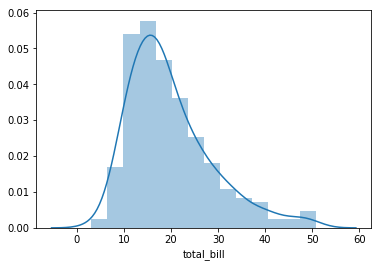

In [4]:
sns.distplot(tips['total_bill']) 
#plot distributed plot using function distplot
# we have plotted bill distribution

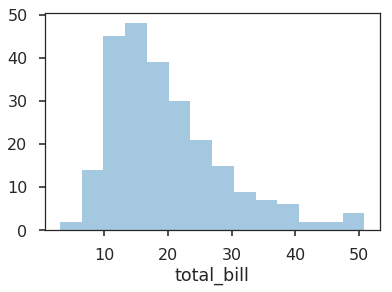

In [153]:
# to remove the kde we use kde is false to get only histogram 
sns.distplot(tips['total_bill'],kde = False)

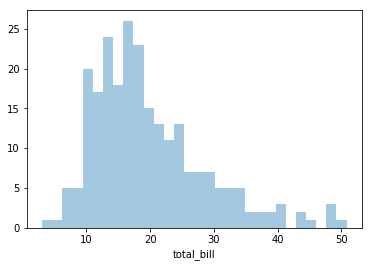

In [10]:
sns.distplot(tips['total_bill'],kde = False , bins = 30)
#no of bins

### Joint plots 

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

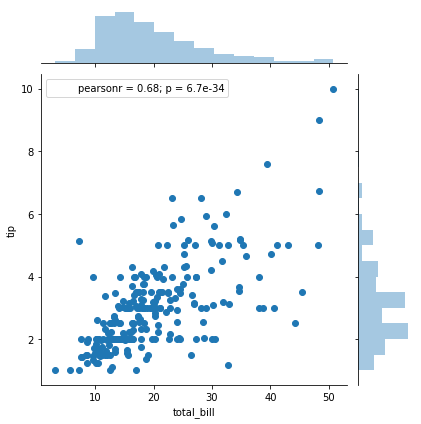

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#compare two graphs attributes 
#on x axis we have total bill and on y axis we have tip
# in between we have a scattered plot

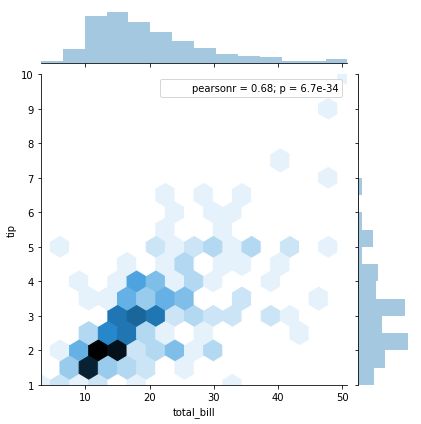

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'hex')
#we have kind attribute also we can have hex 

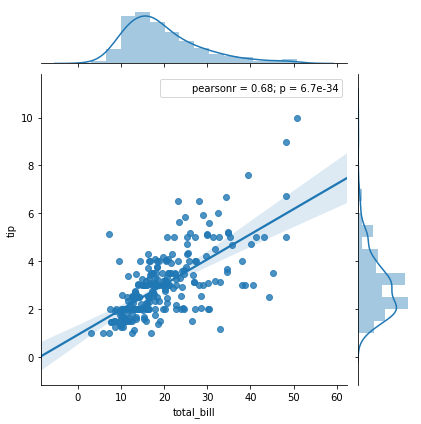

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'reg')
#reg = regression line

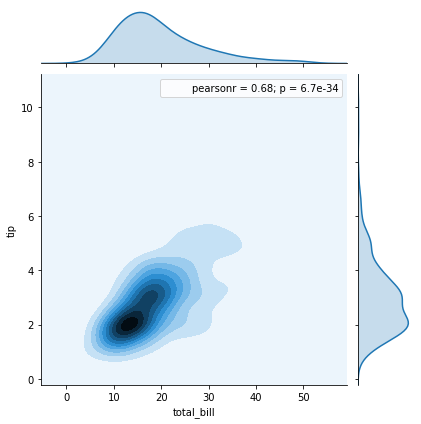

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'kde')
#it give as density where most points are

### Pair Plot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

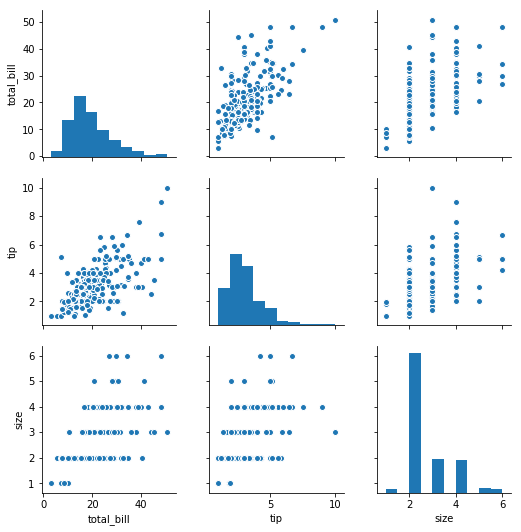

In [21]:
sns.pairplot(tips)
#we have pair plot of all numerical values

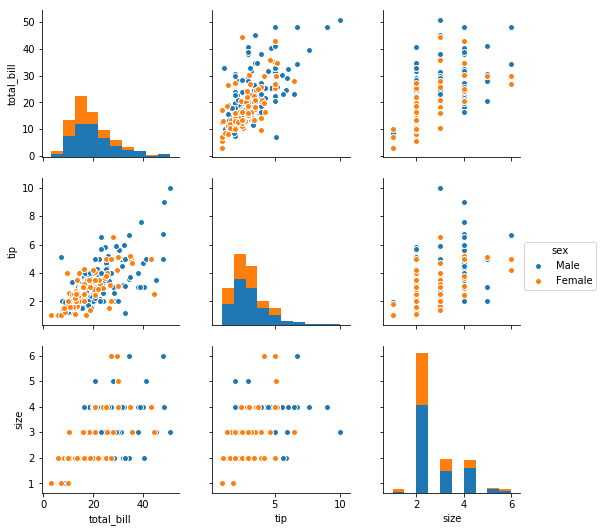

In [18]:
sns.pairplot(tips,hue = 'sex')
#we can make graph to differenciate types in an attributes
#sex columns have two types male and female

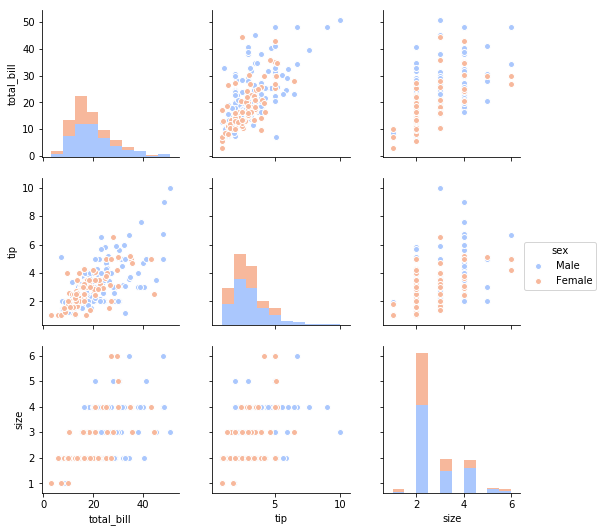

In [20]:
sns.pairplot(tips,hue = 'sex',palette = 'coolwarm')
#palette attribute where we have blue for male and pink for female

###  Rug plot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

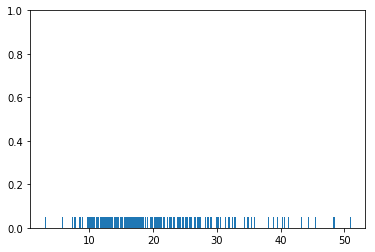

In [25]:
#rug draws dash marks for every point on this universe 
# distributions(total_bill) between 10 and 20 there is more rugs
# means here value is very high
sns.rugplot(tips['total_bill'])

### kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

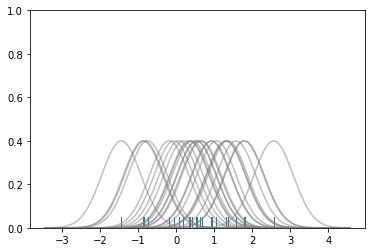

In [28]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
#we have created a random set and apply rugpot on it
#gray part represent normal distribution or each element

Text(0.5,0.98,'Sum of the Basis Functions')

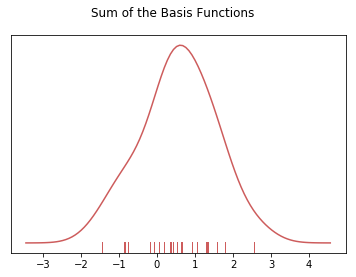

In [29]:
# To get the kde plot we can sum these basis functions.
# we get a kde plot of distribution and rug plot

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

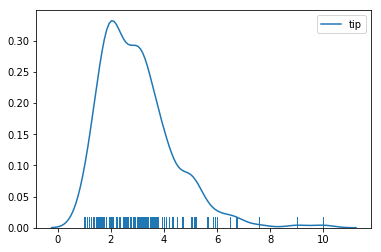

In [30]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

### Categorical Plots
Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

### barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:  

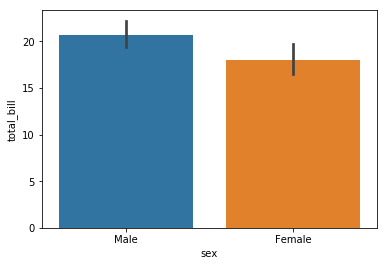

In [36]:
sns.barplot(x ='sex' , y ='total_bill' , data=tips)

In [37]:
import numpy as np

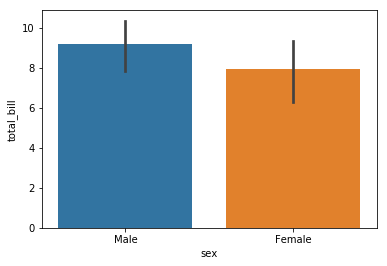

In [38]:
sns.barplot(x ='sex' , y ='total_bill' , data=tips,estimator=np.std)
#we can have our own estimator functions

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value: 

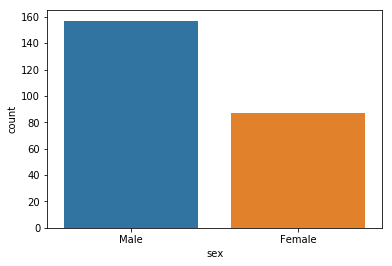

In [40]:
sns.countplot(x='sex',data=tips)
#it counts the occurences of male and female and give us a bar graph

### boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. 

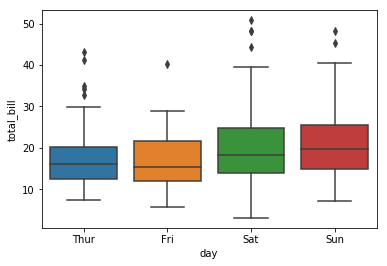

In [41]:
sns.boxplot(x='day',y='total_bill',data=tips)
#it shows the quartiles of data set


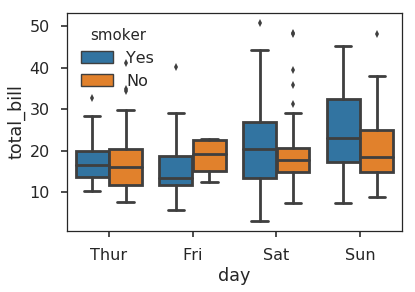

In [156]:
sns.boxplot(x='day',y='total_bill',data=tips ,hue = 'smoker' )
#we have added a new parameter hue
# plot have been splitted

### violinplot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
 

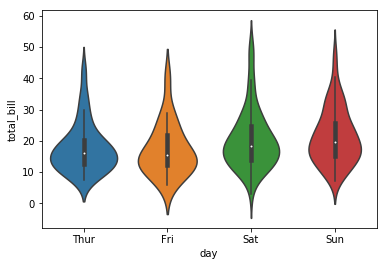

In [45]:
sns.violinplot(x = 'day',y = 'total_bill' , data = tips)

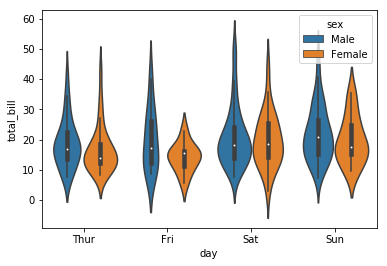

In [47]:
sns.violinplot(x = 'day',y = 'total_bill' , data = tips,hue = 'sex')

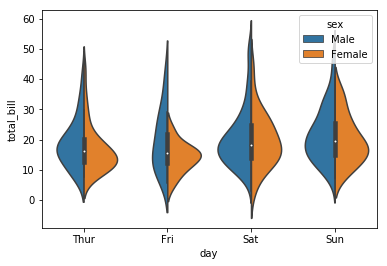

In [48]:
sns.violinplot(x = 'day',y = 'total_bill' , data = tips,hue = 'sex',split = True)

###  stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

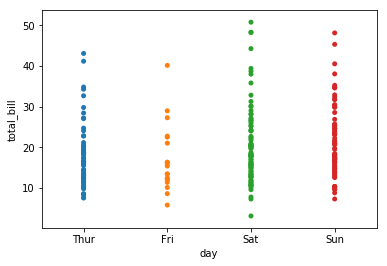

In [49]:
sns.stripplot(x = 'day',y = 'total_bill',data = tips)

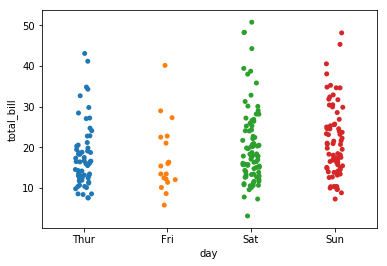

In [50]:
sns.stripplot(x = 'day',y = 'total_bill',data = tips,jitter = True)

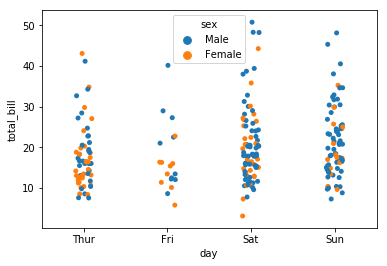

In [51]:
sns.stripplot(x = 'day',y = 'total_bill',data = tips,jitter = True,hue = 'sex')

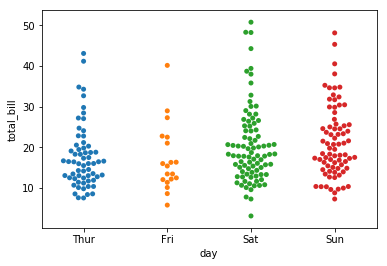

In [54]:
sns.swarmplot(x = 'day',y = 'total_bill',data = tips)

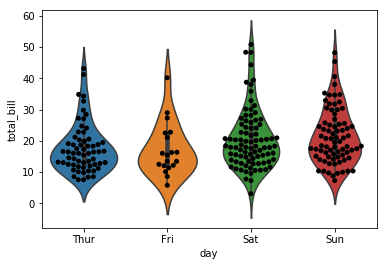

In [56]:
sns.violinplot(x = 'day',y = 'total_bill',data = tips)
sns.swarmplot(x = 'day',y = 'total_bill',data = tips, color = 'black')
#combination of swarm plot and voilin plot

### factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type: 

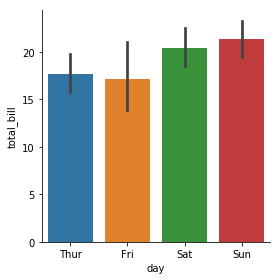

In [57]:
sns.factorplot(x = 'day',y = 'total_bill',data = tips,kind = 'bar')

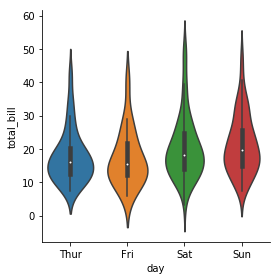

In [58]:
sns.factorplot(x = 'day',y = 'total_bill',data = tips,kind = 'violin')

##  Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [60]:
flight = sns.load_dataset('flights')
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
tc=tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example: 

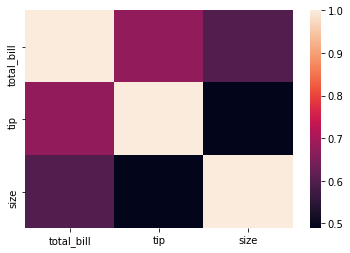

In [65]:
sns.heatmap(tc)

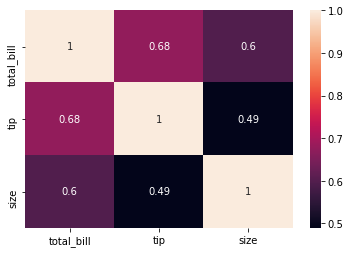

In [66]:
sns.heatmap(tc , annot =True)

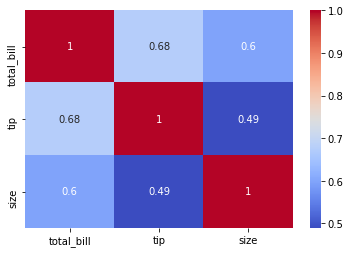

In [69]:
sns.heatmap(tc , annot =True ,cmap = 'coolwarm' )

In [70]:
flight

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [74]:
fp =flight.pivot_table(index = 'month',columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


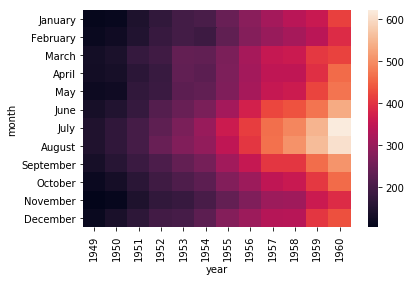

In [75]:
sns.heatmap(fp)
#it gives us heatted colors and scale for these colors

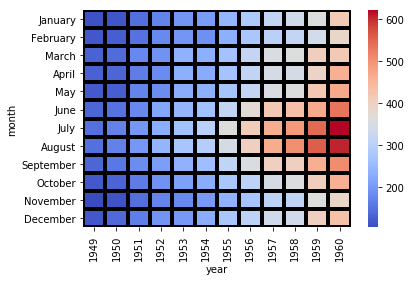

In [82]:
sns.heatmap(fp,cmap='coolwarm',linecolor = 'black' , linewidth = 3 )
# we have some more parameters like lc and lw

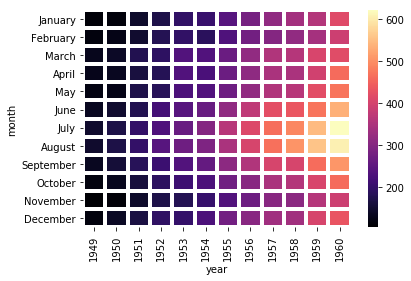

In [81]:
sns.heatmap(fp,cmap='magma',linecolor = 'white' , linewidth = 3 )

### clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example: 

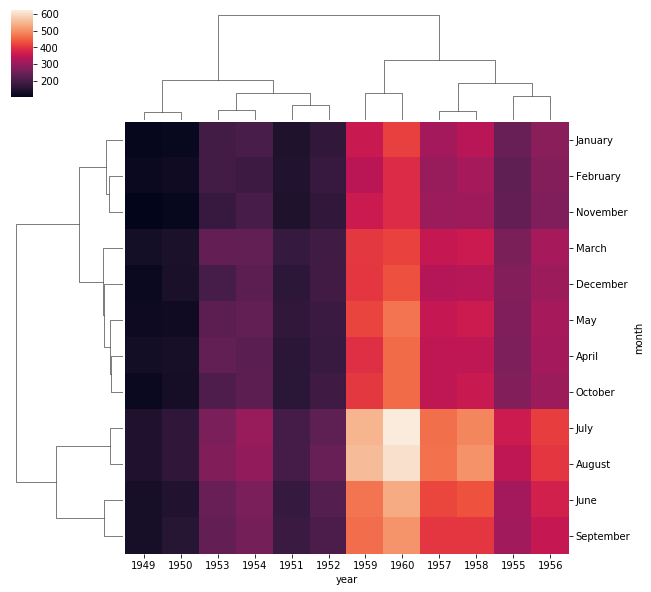

In [83]:
sns.clustermap(fp)
#clusters shows how close these columns and row are
# it give little more information as heat map

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months) 

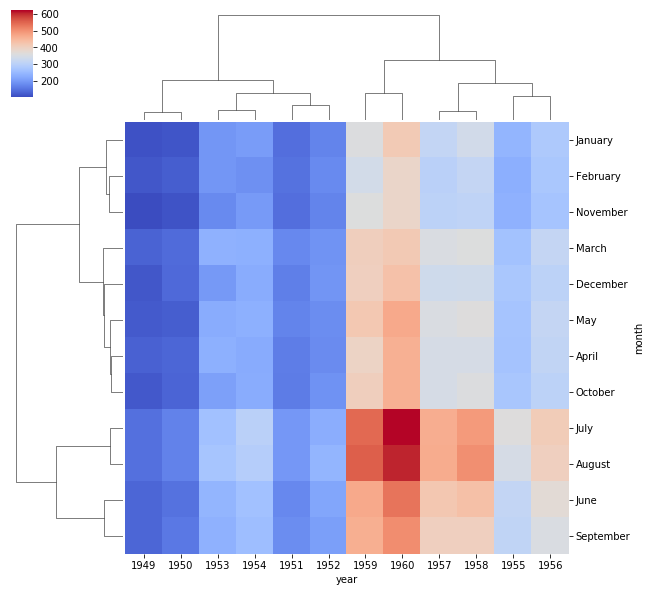

In [84]:
  sns.clustermap(fp , cmap='coolwarm')

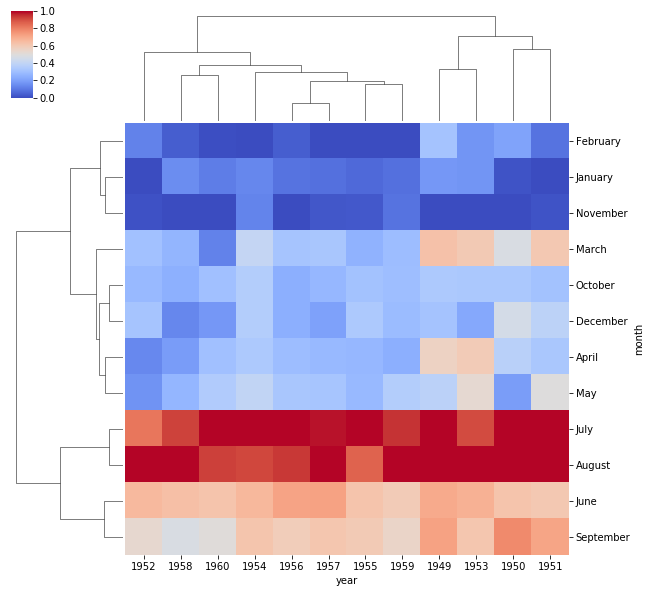

In [85]:
sns.clustermap(fp , cmap = 'coolwarm' , standard_scale =1)

## Regression plots 

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

#### lmplot 

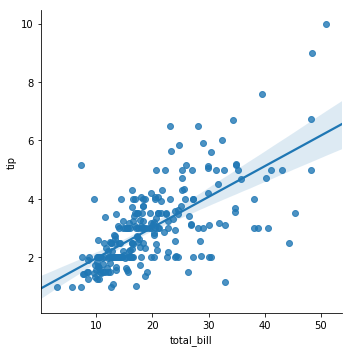

In [87]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips)
#basically have a scattered plot with a linear line

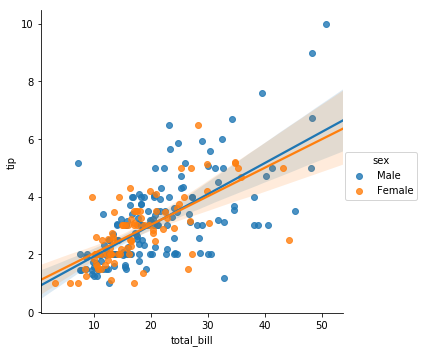

In [88]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , hue = 'sex')
# separation on sex

#### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation. 

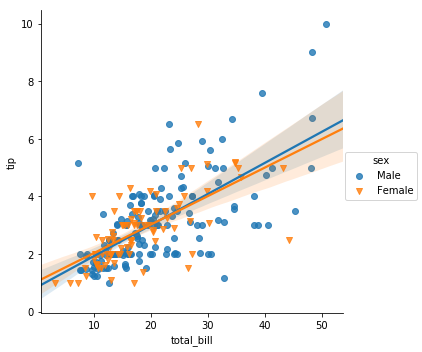

In [89]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , hue = 'sex' , markers = [ 'o','v'])
# we have options of markers as in matplot

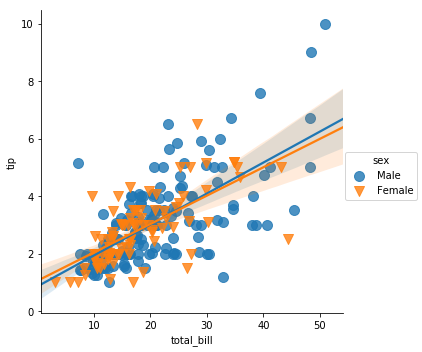

In [90]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , hue = 'sex' ,
           markers = [ 'o','v'] , scatter_kws = {'s':100})
# increase the size of markers

### Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments: 

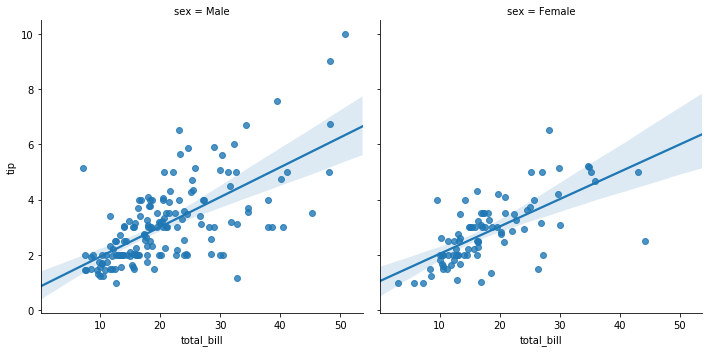

In [92]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , col = 'sex' )
# instead of use hue we can separate using col

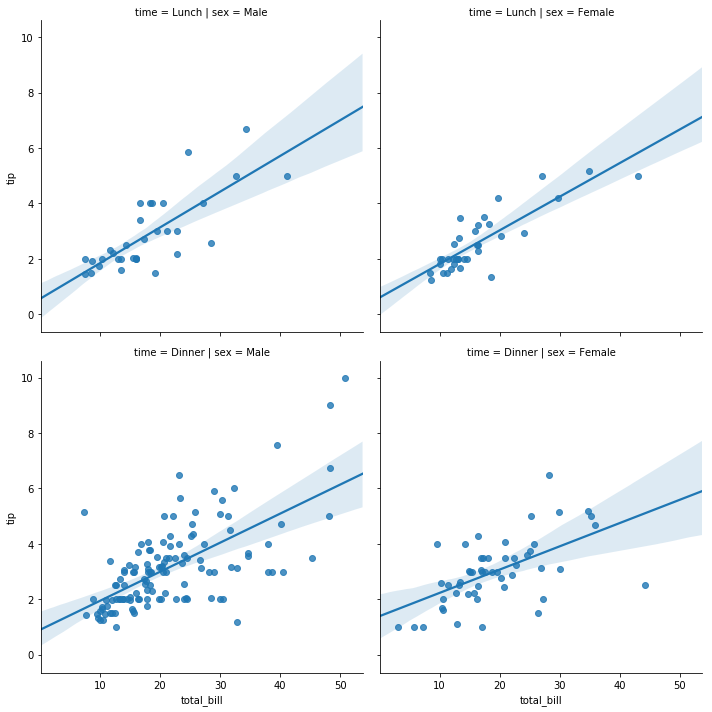

In [93]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , col = 'sex', row = 'time')


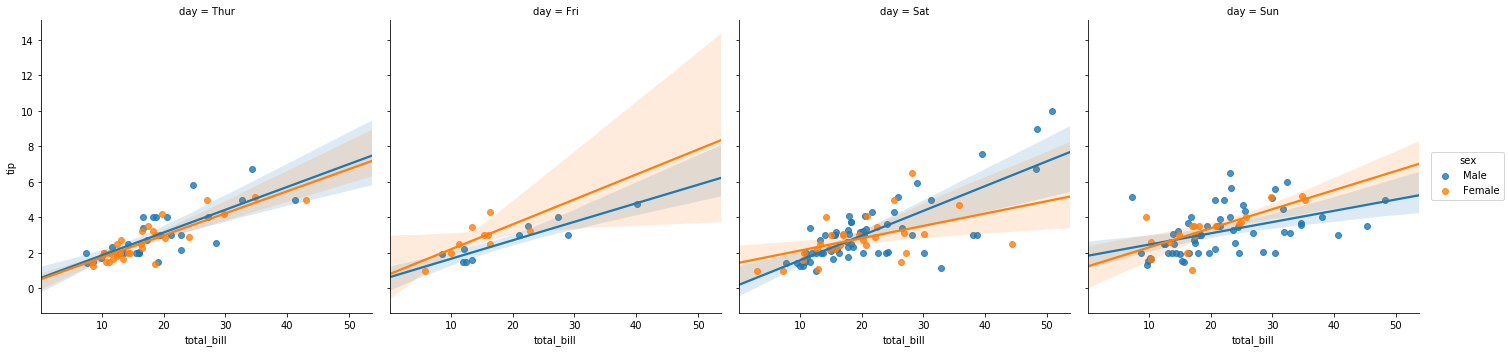

In [97]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , col = 'day',
           hue = 'sex')


### Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:  

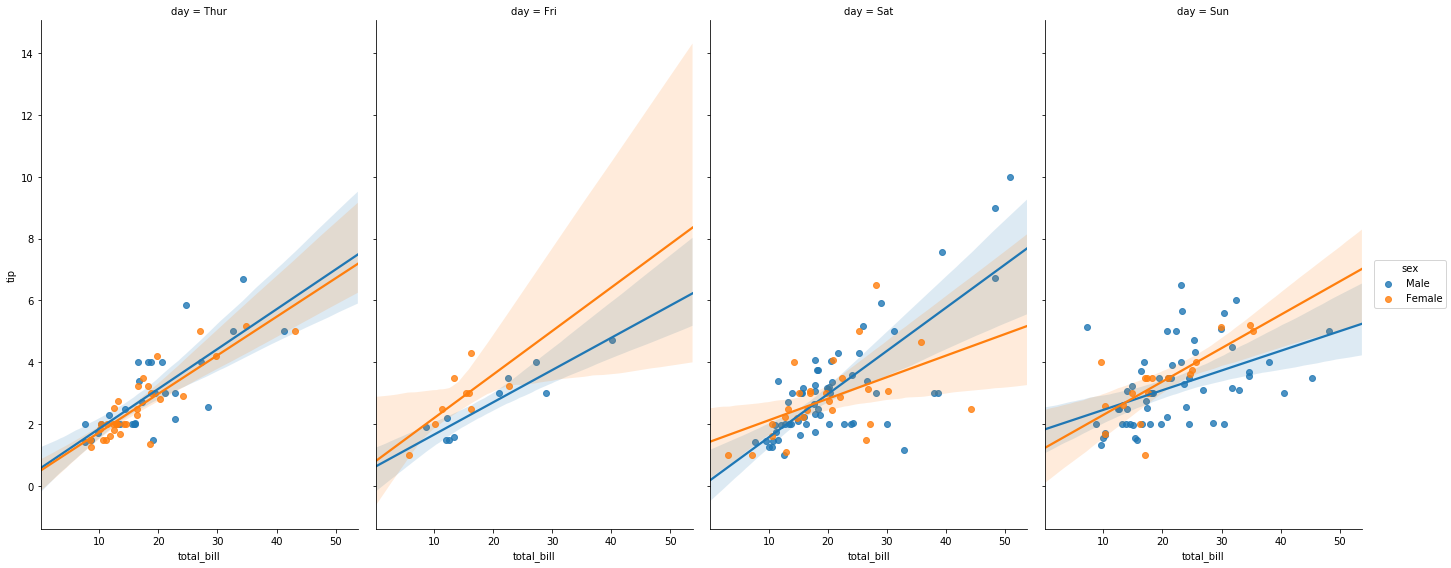

In [101]:
sns.lmplot(x = 'total_bill',y = 'tip',data = tips , col = 'day',
           hue = 'sex', aspect = 0.6 , size = 8)


### Grid  
Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [102]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

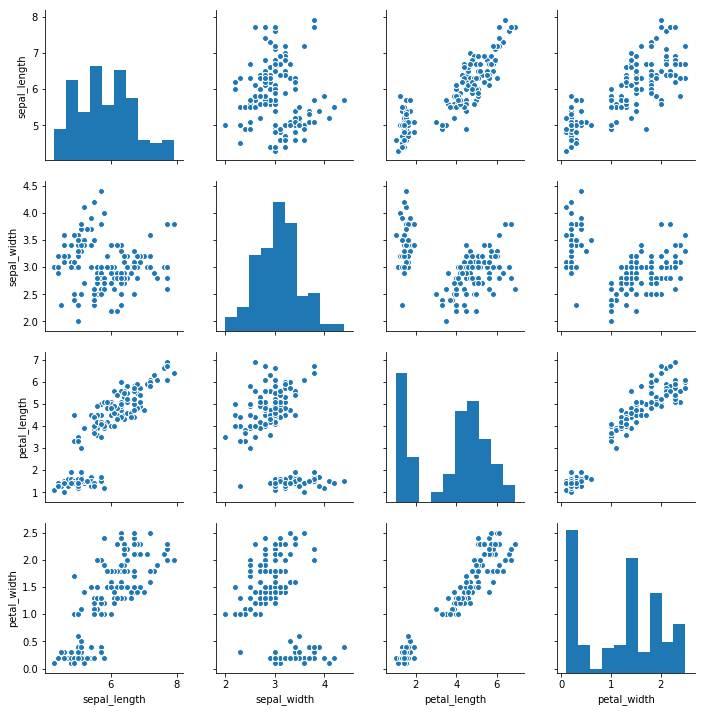

In [104]:
sns.pairplot(iris)

### PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset. 

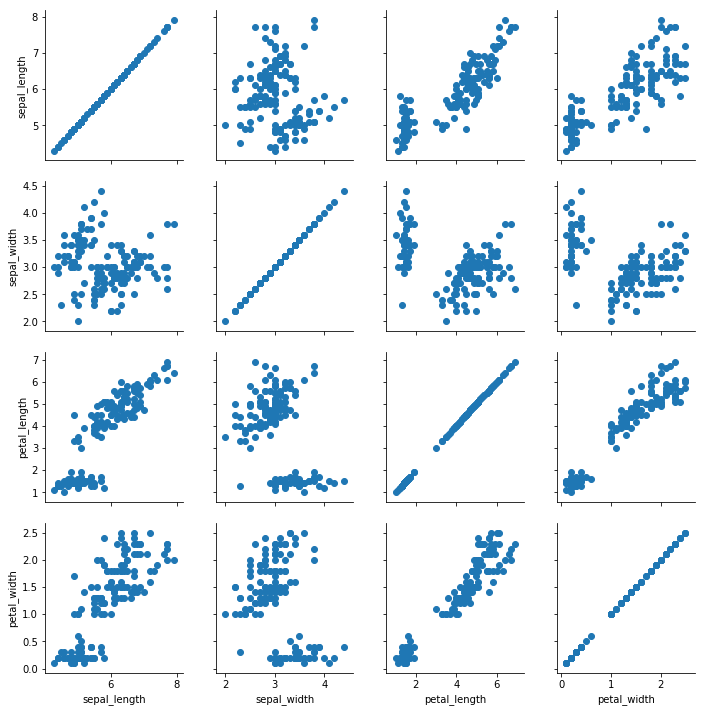

In [107]:
g = sns.PairGrid(iris) # we make empty pair grid and assign to a variable

g.map(plt.scatter) #now plot scatter graph on it


/home/omer/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


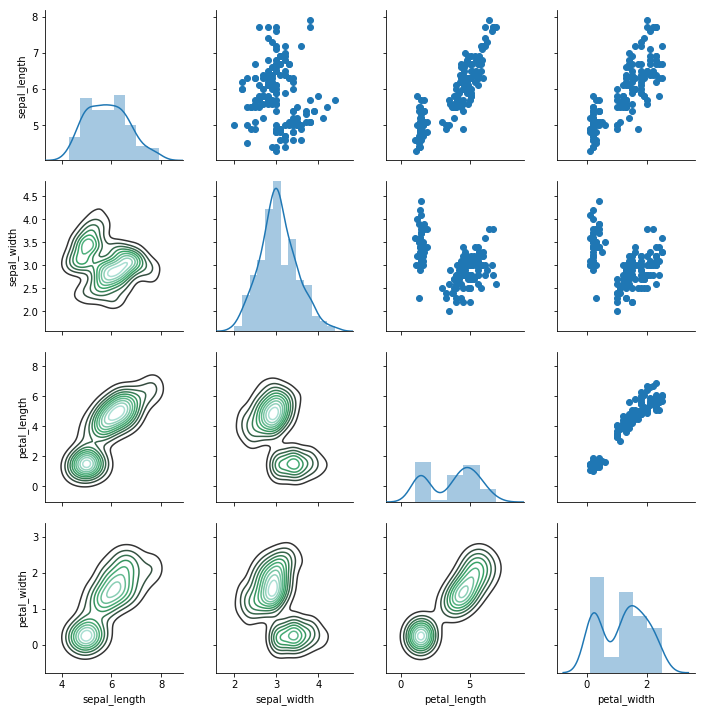

In [109]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [111]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature: 

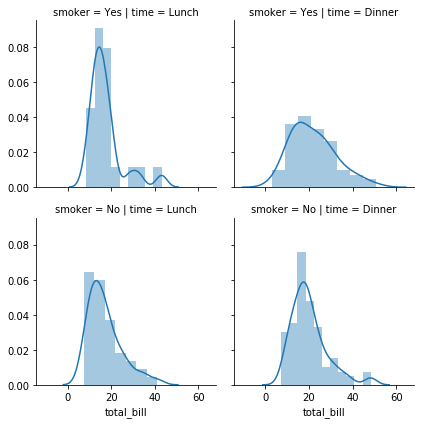

In [113]:
g = sns.FacetGrid(data= tips , col ='time' , row ='smoker' )
g.map(sns.distplot,'total_bill')

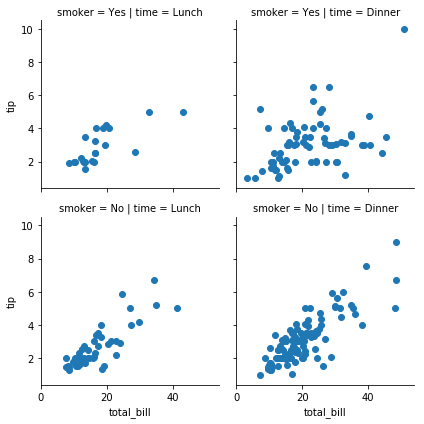

In [114]:
g = sns.FacetGrid(data= tips , col ='time' , row ='smoker' )
g.map(plt.scatter,'total_bill','tip')

### JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example 

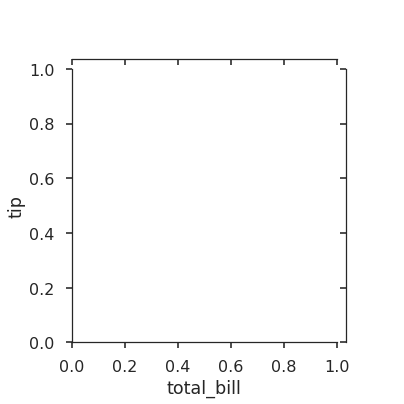

In [157]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

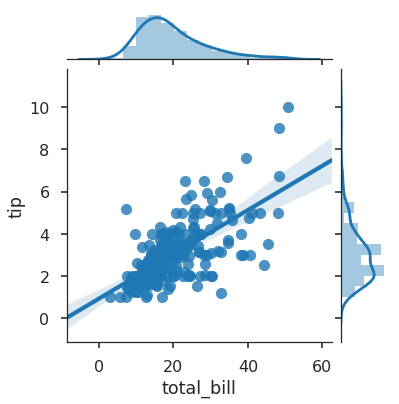

In [158]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

### Styles and Color

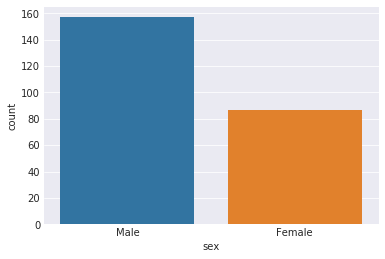

In [125]:
# we can set styles like 'ticks' ,'white' ,'darkgrid' , whitegrid'
sns.set_style('darkgrid') 
sns.countplot(x = 'sex' , data = tips)

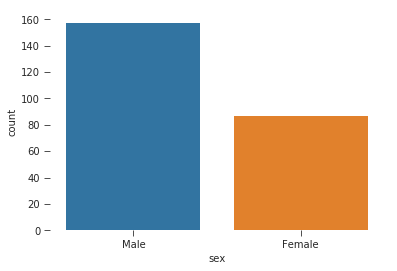

In [128]:
# we can set styles like 'ticks' ,'white' ,'darkgrid' , whitegrid'
sns.set_style('ticks') 
sns.countplot(x = 'sex' , data = tips)
# if you want to remove spine of plot
sns.despine(left = True , bottom = True)

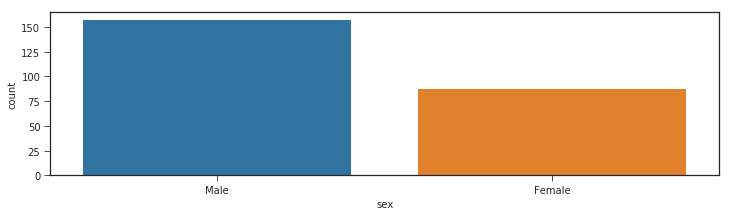

In [132]:
# we can set figure size of plot, we have set it 12 by 3 
plt.figure(figsize = (12,3))
sns.countplot(x = 'sex' , data = tips)

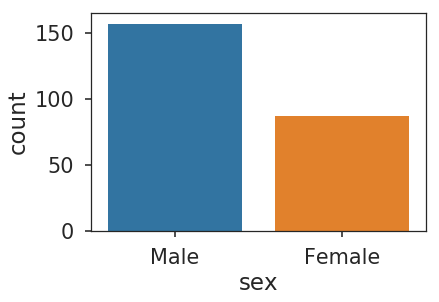

In [137]:
# if you want to draw for a poster , page , notebook or any large
#you can use set_context
sns.set_context('poster',font_scale = 1.3)
sns.countplot(x = 'sex' , data = tips)

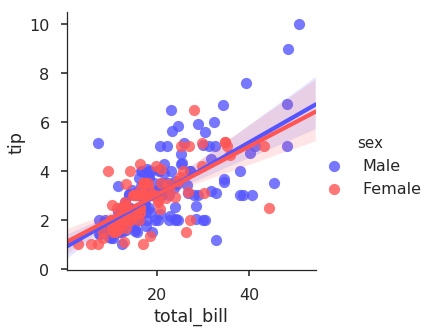

In [152]:
sns.set_context(font_scale = 1)
sns.lmplot(x = 'total_bill', y = 'tip' , data = tips , hue = 'sex' ,
           palette = 'seismic')
#we can have a look on palette on matlplot website for more